In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = np.matrix(pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mnist/mnist_train.csv', skiprows=1, header=None))

Y_train = dataset[:, 0]
Y_train = np.eye(10)[Y_train] # one hot

X_train = dataset[:, 1:]

print(X_train.shape)
print(Y_train.shape)

(60000, 784)
(60000, 1, 10)


In [0]:
lr = 0.01
epochs = 10
N = 60

D_in = 784
D_H1 = 65
D_H2 = 15
D_out = 10

In [0]:
W1 = np.random.randn(D_H1, D_in) # 65 * 784
W2 = np.random.randn(D_H2, D_H1) # 15 * 65
W3 = np.random.randn(D_out, D_H2) # 10 * 15

B1 = np.random.randn(D_H1 , 1) # 65 * 1
B2 = np.random.randn(D_H2 , 1) # 15 * 1
B3 = np.random.randn(D_out , 1) # 10 * 1

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [28]:
errors = []

for epoch in range(epochs):

    epoch_errors = []

    for n in range(N):

        x = X_train[n].T
        y = Y_train[n].T

        # forward

        net1 = np.matmul(W1, x) + B1
        out1 = sigmoid(net1)

        net2 = np.matmul(W2, out1) + B2
        out2 = sigmoid(net2)

        net3 = np.matmul(W3, out2) + B3
        out3 = net3
        y_hat = out3

        # print(y_hat)

        # bp

        error = np.sum(np.power((y - y_hat), 2))
        epoch_errors.append(error)

        grad_out3 = 2 * (y - y_hat)
        grad_net3 = grad_out3
        grad_W3 = np.matmul(grad_net3, out2.T)
        grad_B3 = grad_net3

        grad_out2 = np.matmul(W3.T, grad_net3)
        grad_net2 = np.multiply(grad_out2, np.multiply(out2 , (1 - out2)))
        grad_W2 = np.matmul(grad_net2, out1.T)
        grad_B2 = grad_net2

        grad_out1 = np.matmul(W2.T, grad_net2)
        grad_net1 = np.multiply(grad_out1, np.multiply(out1, (1 - out1)))
        grad_W1 = np.matmul(grad_net1, x.T)
        grad_B1 = grad_net1

        # update

        W1 = W1 + lr * grad_W1
        W2 = W2 + lr * grad_W2
        W3 = W3 + lr * grad_W3

        B1 = B1 + lr * grad_B1
        B2 = B2 + lr * grad_B2
        B3 = B3 + lr * grad_B3

    errors.append(sum(epoch_errors) / N)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


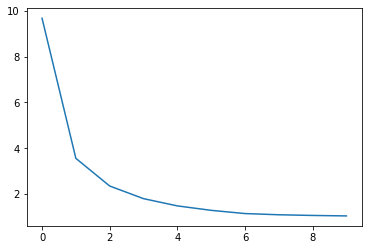

In [29]:
errors = np.array(errors)
errors = errors.reshape(epochs, 1)

plt.plot(errors)
plt.show()